In [ ]:
import numpy as np
import pandas as pd



## 連接至雲端硬碟

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 讀資料
  craw_stat.py

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/資料分析final(個人專題)/data7days2.csv') 

## 資料前處理
- 處理缺失值
- 刪除沒比賽的row(TARGET = -1)
- GS小於11的刪除(可能中間是ALL STAR BREAK或是下雨太多影響，這個條件要不要保留待考慮)

### 處理缺失值

In [ ]:
df['WPERD'] = df['WPER'] - df['WPERN']
df["OPP_FIP"] = np.nan
df["OPP_WRC+"] = np.nan
df["OPP_WPER"] = np.nan
df["OPP_WPERN"] = np.nan
df["OPP_WPERD"] = np.nan
df["OPP_DEF"] = np.nan

In [ ]:
df["OPP_WPER"] = np.nan
df["OPP_OBP"] = np.nan
df["OPP_ERA"] = np.nan
df["OPP_AVG"] = np.nan

In [ ]:
print("Length of  dataset: 44100")
print("After Step 2: 38306")
print("After Step 3: 37233")
print("After Step 4: 18688")

Length of  dataset: 44100
After Step 2: 38306
After Step 3: 37233
After Step 4: 18688


In [ ]:
df.isnull().sum()

### 增加特徵
- 對手的FIP
- 對手的WRC+
- 對手的OBP

In [ ]:
#沒加break之前執行時間5分鐘
gameday = len(df)//30
print(gameday)

for i in range(0,gameday):
  for j in range(30):
    tempopp = df["OPP"].loc[i*30+j]
    if tempopp != 'NONE':
      for k in range(30):
        if df.loc[i*30+k]['TEAM'] == tempopp:
          df.loc[i*30+k,"OPP_WPER"] = df.loc[i*30+j]['WPER']
          df.loc[i*30+k,"OPP_FIP"] = df.loc[i*30+j]['FIP']
          df.loc[i*30+k,"OPP_WRC+"] = df.loc[i*30+j]['WRC+']
          df.loc[i*30+k,"OPP_WPERN"] = df.loc[i*30+j]['WPERN']
          df.loc[i*30+k,"OPP_WPERD"] = df.loc[i*30+j]['WPERD']
          df.loc[i*30+k,"OPP_DEF"] = df.loc[i*30+j]['DEF']
          df.loc[i*30+k,"OPP_OBP"] = df.loc[i*30+j]['OBP']
          df.loc[i*30+k,"OPP_ERA"] = df.loc[i*30+j]['ERA']  
          df.loc[i*30+k,"OPP_AVG"] = df.loc[i*30+j]['AVG']  
          break

1470


### 把相同對戰組合兩個row刪掉一個

In [ ]:
gameday = len(df)//30
print(gameday)
for i in range(0,gameday):
  gamelist = []
  for j in range(30):
    if df["OPP"].loc[i*30+j] not in gamelist:
      gamelist.append(df["OPP"].loc[i*30+j])
      gamelist.append(df["TEAM"].loc[i*30+j])
    else:
      df.loc[i*30+j,'OPP'] = 'NONE'


1470


In [ ]:
print(df.loc[123])

### 刪除沒比賽的row(TARGET = -1)
  - 紀錄->38306場比賽

In [ ]:

none_game = df[df['TARGET'] == -1].index
df = df.drop(none_game)
print(len(df))

38306


### GS小於4的刪除

In [ ]:
print(len(df))
none_game = df[df['GS'] < 4].index
df = df.drop(none_game)
print(len(df))
none_game = df[df['OPP'] == 'NONE'].index
df = df.drop(none_game)
print(len(df))

38306
37233
37233


### 增加特徵
- 與對手的FIP相減
- 與對手的WRC+相減
- 與對手的OBP相減

In [ ]:
df['NEW_FIP'] = df['FIP'] - df['OPP_FIP']
df['NEW_WRC+'] = df['WRC+'] - df['OPP_WRC+']
df['NEW_WPER'] = df['WPER'] - df['OPP_WPER']
df['NEW_WPERN'] = df['WPERN'] - df['OPP_WPERN']
df['NEW_DEF'] = df['DEF'] - df['OPP_DEF']
print(df.head())

  TEAM  HR  RBI    BB%     K%    ISO  BABIP    AVG    OBP    SLG  ...  \
0  CLE  14   40   9.2%  20.0%  0.268  0.329  0.301  0.378  0.569  ...   
1  TBR   7   38   9.5%  17.3%  0.190  0.331  0.292  0.357  0.481  ...   
2  KCR   7   28   8.7%  13.0%  0.224  0.310  0.293  0.357  0.517  ...   
3  STL   5   40   9.1%  15.7%  0.133  0.338  0.294  0.369  0.427  ...   
4  NYY   9   34  13.2%  20.5%  0.181  0.287  0.250  0.353  0.431  ...   

   OPP_WPERD  OPP_DEF  OPP_OBP  OPP_ERA  OPP_AVG  NEW_FIP  NEW_WRC+  NEW_WPER  \
0     -0.017     -1.3    0.326     3.11    0.248     0.08      54.0     0.204   
1      0.000     -2.0    0.361     3.35    0.278    -0.87      14.0     0.072   
2      0.019     -2.9    0.322     3.92    0.261     1.46      32.0     0.036   
3     -0.013      0.4    0.315     4.20    0.242    -0.27      19.0    -0.083   
4      0.015     -1.3    0.281     5.85    0.233    -0.62      47.0     0.211   

   NEW_WPERN  NEW_DEF  
0      0.187     -2.9  
1      0.072      2.1  
2 

In [ ]:
df['NEW_OBP'] = df['OBP'] - df['OPP_OBP']
df['NEW_AVG'] = df['AVG'] - df['OPP_AVG']
df['NEW_ERA'] = df['ERA'] - df['OPP_ERA']


In [ ]:
print(len(df))

37233


## 觀察資料的特性
- HEAT MAP

### HEAT MAP

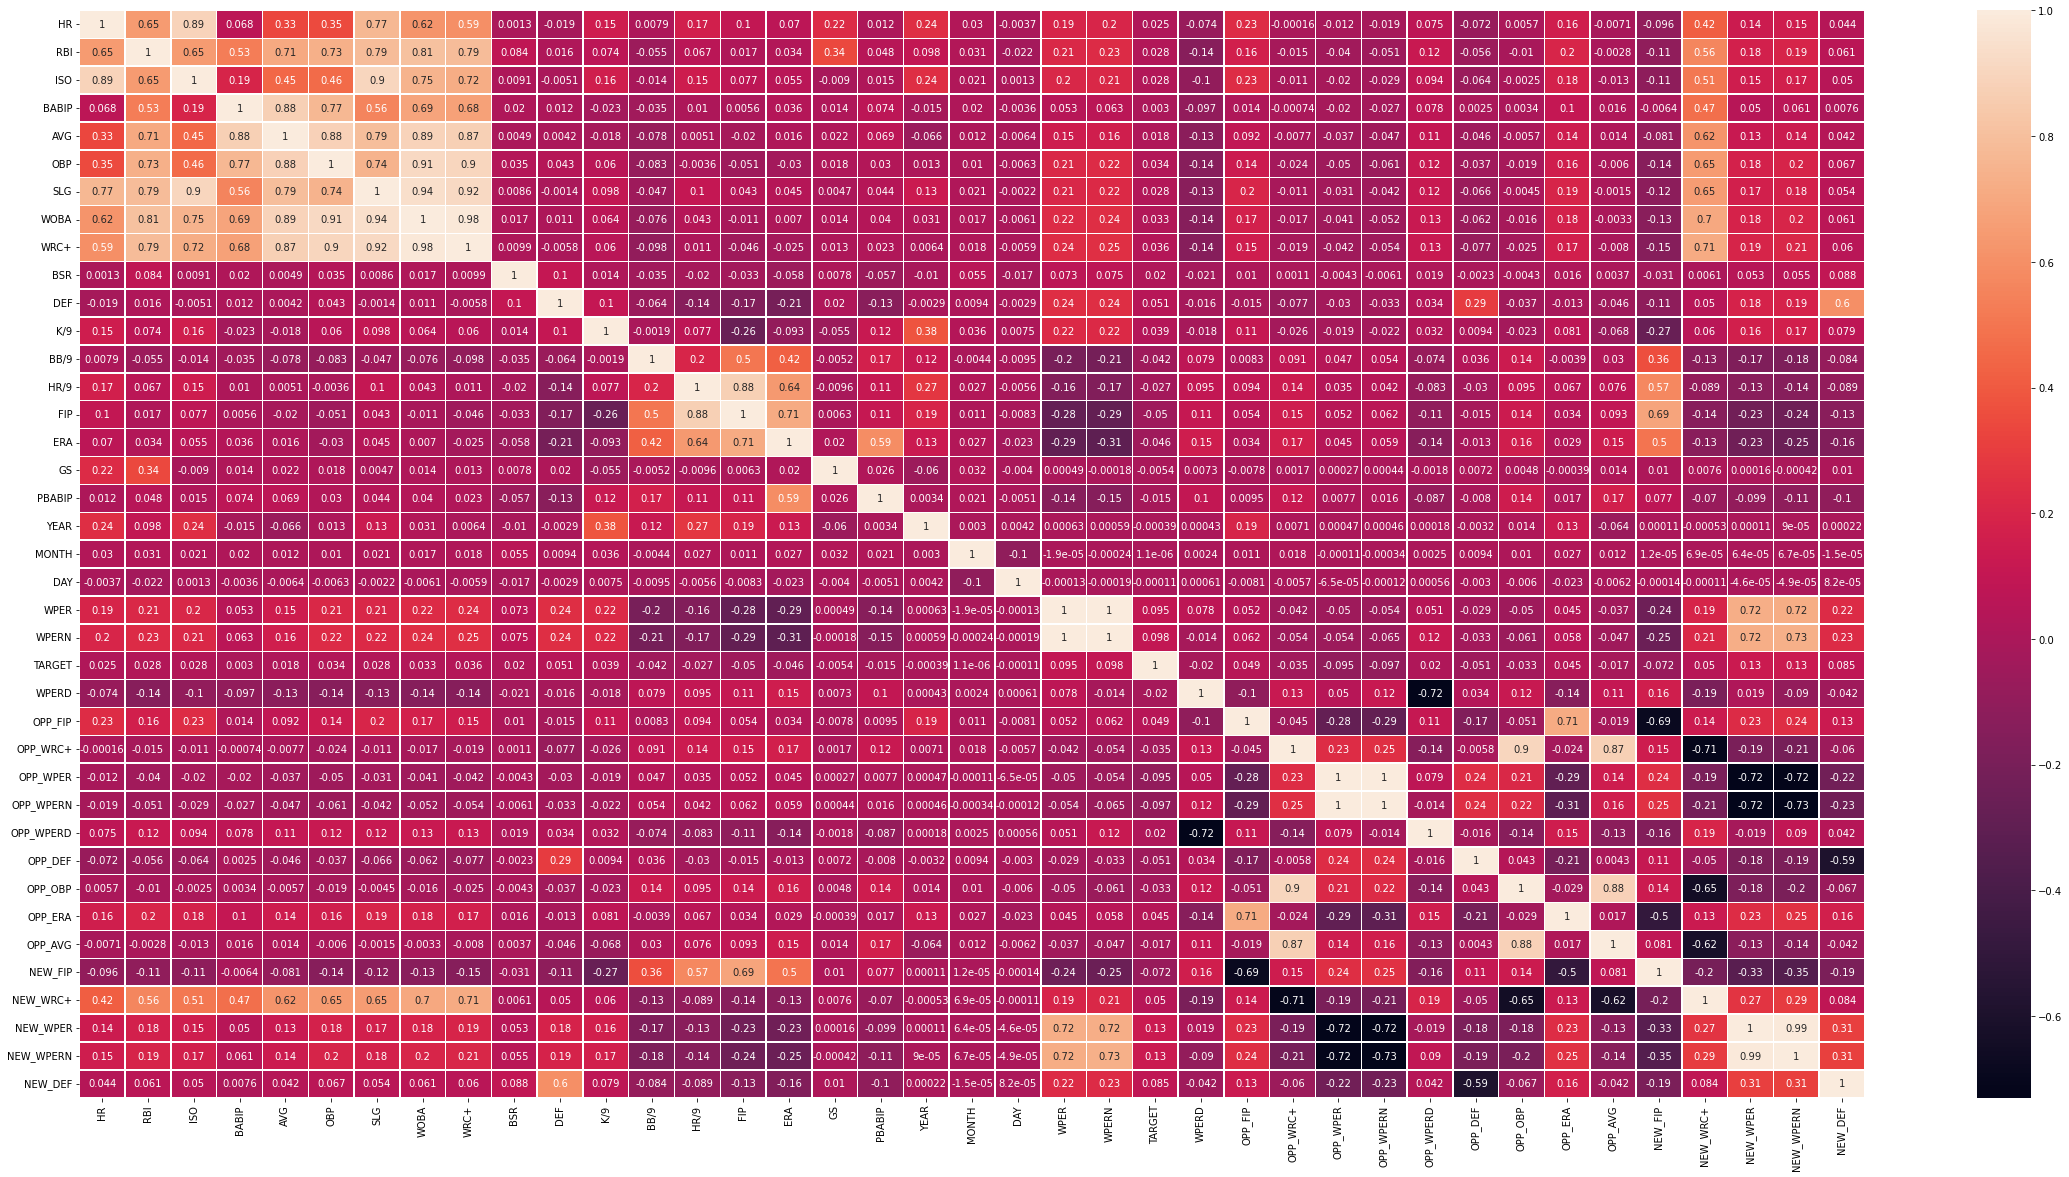

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(40,20))
# Please use a function of Pandas here.
sns.heatmap(df.corr(),annot=True,linewidth=0.5)
plt.show()

## 挑選特徵
- 觀察 heatmap 中具有"顯著"正相關或是"顯著"負相關的特徵


In [ ]:
df2 = df

In [ ]:

none_game = df2[df2['YEAR'] < 2015].index
df2 = df2.drop(none_game)
print(len(df2))

22139


In [ ]:

none_game = df2[df2['TARGET'] == -1].index
df2 = df2.drop(none_game)
print(len(df2))
none_game = df2[df2['GS'] < 4].index
df2 = df2.drop(none_game)
print(len(df2))
none_game = df2[df2['OPP'] == 'NONE'].index
df2 = df2.drop(none_game)
print(len(df2))

22139
22139
22139


In [ ]:
# X = pd.DataFrame(np.c_[df['NEW_FIP'],df['NEW_WRC+'],df['K/9']], # Please put features inside the bracket
#                  columns = ['NEW_FIP','NEW_WRC+','K/9'] # Please put feature names here 
#                 )
# X = pd.DataFrame(np.c_[df['NEW_OBP'],df['NEW_ERA'],df['NEW_AVG'],df['NEW_WPER']], # Please put features inside the bracket
#                  columns = ['NEW_FIP','NEW_WRC+','NEW_AVG','NEW_WPER'] # Please put feature names here 
#                 )
# X = pd.DataFrame(np.c_[df['NEW_WPER']], # Please put features inside the bracket
#                  columns = ['NEW_WPER'] # Please put feature names here 
#                 )
# X = pd.DataFrame(np.c_[df['NEW_FIP']], # Please put features inside the bracket
#                  columns = ['NEW_FIP'] # Please put feature names here 
#                 )
# X = pd.DataFrame(np.c_[df['WRC+'],df['OPP_WRC+'],df['FIP'],df['OPP_FIP'],df['WPERN'],df['OPP_WPERN'],df['WPERD'],df['OPP_WPERD']], # Please put features inside the bracket
#                  columns = ['WRC+','OPP_WRC+','FIP','OPP_FIP','WPERN','OPP_WPERN','WPERD','OPP_WPERD'] # Please put feature names here 
#                 )
X3 = pd.DataFrame(np.c_[df2['NEW_FIP'],df2['NEW_WRC+'],df2['NEW_WPER'],df2['NEW_DEF']], # Please put features inside the bracket
                 columns = ['NEW_FIP','NEW_WRC+','NEW_WPER','NEW_DEF'] # Please put feature names here 
                )
X2 = pd.DataFrame(np.c_[df['NEW_WPER']], # Please put features inside the bracket
                 columns = ['NEW_WPER'] # Please put feature names here 
                )

In [ ]:
print(sum(df['TARGET'] == 0))

8892


In [ ]:
# print(len(df))
# print(sum(df['NEW_WRC+']*df['TARGET'] < 0))
# print(sum(df['NEW_WRC+']*df['TARGET'] > 0))
# print(sum(df['NEW_WPER']*df['TARGET'] < 0))
# print(sum(df['NEW_WPER']*df['TARGET'] > 0))
# # print(sum(df['NEW_FIP']*df['TARGET'] < 0))
# # print(sum(df['NEW_FIP']*df['TARGET'] < 0))

35126
8222
9086
7689
9628


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X3,df2['TARGET'],test_size=0.2, random_state=947)
# X_train, X_test, Y_train, Y_test = train_test_split(X,df['TARGET'],test_size=0.2, random_state=947)

print(X_train.shape) #(404, 2)
print(X_test.shape) #(102, 2)
print(Y_train.shape) #(404, )
print(Y_test.shape) #(102, )

(17711, 4)
(4428, 4)
(17711,)
(4428,)


## 8: 訓練 Linear Regression 模型，並說明訓練結果
- 利用 scikit-learn，將資料 fit 在 LinearRegression
- 將結果繪製成散佈圖 (scatter plot)，其中 X軸 為 Y_pred、Y軸為 Y_true

In [ ]:
def plot_result():
  plt.figure(figsize=(4,4))
  plt.scatter(x = y_pred, y = Y_test)
  plt.xlim(0,1)
  plt.ylim(0,1)
  plt.xlabel("Y_pred")
  plt.ylabel("Y_true")
  plt.title("Prediction")
  plt.show()

In [ ]:
def print_acc(): 
  for i in range(len(y_pred)):
    if y_pred[i] < 0.5:
      y_pred[i] = 0
    else:
      y_pred[i] = 1
  print(y_pred)
  from sklearn.metrics import confusion_matrix
  tn, fp, fn, tp = confusion_matrix(Y_test, y_pred).ravel()
  print(tn, fp, fn, tp)
  print((tp+tn)/len(Y_test))

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

### linear regression

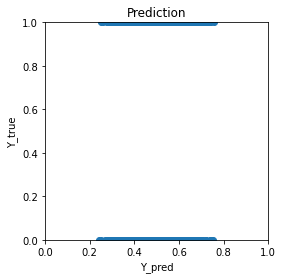

0.5012210629265742
[1. 0. 1. ... 1. 0. 0.]
1272 973 920 1263
0.5724932249322493


In [ ]:
model = LinearRegression()
model.fit(X_train,Y_train)
y_pred = model.predict(X_test)
plot_result()
print(y_pred.mean())
print_acc()

## TEST

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/資料分析final(個人專題)/data_test.csv') 

In [ ]:
df['WPERD'] = df['WPER'] - df['WPERN']
df["OPP_FIP"] = np.nan
df["OPP_WRC+"] = np.nan
df["OPP_WPER"] = np.nan
df["OPP_WPERN"] = np.nan
df["OPP_WPERD"] = np.nan
df["OPP_DEF"] = np.nan
#沒加break之前執行時間5分鐘
gameday = len(df)//30
print(gameday)

for i in range(0,gameday):
  for j in range(30):
    tempopp = df["OPP"].loc[i*30+j]
    if tempopp != 'NONE':
      for k in range(30):
        if df.loc[i*30+k]['TEAM'] == tempopp:
          df.loc[i*30+k,"OPP_WPER"] = df.loc[i*30+j]['WPER']
          df.loc[i*30+k,"OPP_FIP"] = df.loc[i*30+j]['FIP']
          df.loc[i*30+k,"OPP_WRC+"] = df.loc[i*30+j]['WRC+']
          df.loc[i*30+k,"OPP_WPERN"] = df.loc[i*30+j]['WPERN']
          df.loc[i*30+k,"OPP_WPERD"] = df.loc[i*30+j]['WPERD']
          df.loc[i*30+k,"OPP_DEF"] = df.loc[i*30+j]['DEF']
          df.loc[i*30+k,"OPP_OBP"] = df.loc[i*30+j]['OBP']
          df.loc[i*30+k,"OPP_ERA"] = df.loc[i*30+j]['ERA']  
          df.loc[i*30+k,"OPP_AVG"] = df.loc[i*30+j]['AVG']  
          break
none_game = df[df['TARGET'] == -1].index
df = df.drop(none_game)
print(len(df))
print(len(df))
none_game = df[df['GS'] < 4].index
df = df.drop(none_game)
print(len(df))
none_game = df[df['OPP'] == 'NONE'].index
df = df.drop(none_game)
print(len(df))
df['NEW_FIP'] = df['FIP'] - df['OPP_FIP']
df['NEW_WRC+'] = df['WRC+'] - df['OPP_WRC+']
df['NEW_WPER'] = df['WPER'] - df['OPP_WPER']
df['NEW_WPERN'] = df['WPERN'] - df['OPP_WPERN']
df['NEW_DEF'] = df['DEF'] - df['OPP_DEF']
none_game = df[df['YEAR'] < 2015].index
df = df.drop(none_game)
print(len(df))
none_game = df[df['TARGET'] == -1].index
df = df.drop(none_game)
print(len(df))
none_game = df[df['GS'] < 4].index
df = df.drop(none_game)
print(len(df))
none_game = df[df['OPP'] == 'NONE'].index
df = df.drop(none_game)
print(len(df))


45
1134
1134
1134
1134
1134
1134
1134
1134


In [ ]:
X3 = pd.DataFrame(np.c_[df['NEW_FIP'],df['NEW_WRC+'],df['NEW_WPER'],df['NEW_DEF']], # Please put features inside the bracket
                 columns = ['NEW_FIP','NEW_WRC+','NEW_WPER','NEW_DEF'] # Please put feature names here 
                )

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X3,df['TARGET'],test_size=0.2, random_state=947)
# X_train, X_test, Y_train, Y_test = train_test_split(X,df['TARGET'],test_size=0.2, random_state=947)

print(X_train.shape) #(404, 2)
print(X_test.shape) #(102, 2)
print(Y_train.shape) #(404, )
print(Y_test.shape) #(102, )

(907, 4)
(227, 4)
(907,)
(227,)


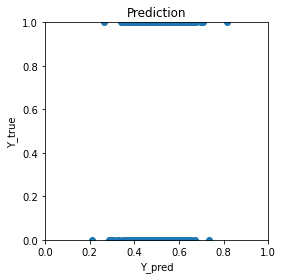

0.49842131490556946
[1. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 1. 1. 0. 1. 0.
 1. 0. 0. 1. 1. 0. 1. 1. 1. 0. 0. 1. 0. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 0.
 0. 1. 0. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 1. 1. 1. 1. 1. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 1. 1. 0.
 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 1. 0. 0. 1. 1. 1. 0. 0. 1.
 0. 0. 0. 0. 1. 0. 1. 1. 1. 1. 0. 0. 0. 0. 1. 0. 1. 1. 0. 1. 0. 0. 1. 1.
 0. 0. 1. 1. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 0. 1. 1. 1. 1. 0. 0. 1. 1. 1.
 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 1. 1. 0. 1. 1. 0. 0. 1. 0. 1. 0.
 1. 0. 0. 1. 1. 0. 1. 1. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0.
 0. 1. 1. 0. 0. 1. 0. 1. 1. 0. 0.]
69 41 46 71
0.6167400881057269


In [ ]:
y_pred = model.predict(X_test)
plot_result()
print(y_pred.mean())
print_acc()

### random forest regressor

In [ ]:
# Modeling
model = RandomForestRegressor(n_estimators = 100, random_state = 9487,min_samples_leaf=1,max_depth=5)
model.fit(X_train,Y_train)
y_pred = model.predict(X_test)
print_acc()

[0. 1. 1. ... 0. 0. 1.]
898 893 793 1140
0.5472610096670247


### XGBooster

In [ ]:
parameters = {'n_estimators': [100], 'max_depth':[6,8,10]}
grid= GridSearchCV(RandomForestRegressor(),param_grid=parameters,verbose = 2)
grid.fit(X_train,Y_train)
y_pred = grid.predict(X_test)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV] END ......................max_depth=6, n_estimators=100; total time=   1.7s
[CV] END ......................max_depth=6, n_estimators=100; total time=   1.7s
[CV] END ......................max_depth=6, n_estimators=100; total time=   1.7s
[CV] END ......................max_depth=6, n_estimators=100; total time=   1.7s
[CV] END ......................max_depth=6, n_estimators=100; total time=   1.8s
[CV] END ......................max_depth=8, n_estimators=100; total time=   2.3s
[CV] END ......................max_depth=8, n_estimators=100; total time=   2.8s
[CV] END ......................max_depth=8, n_estimators=100; total time=   3.3s
[CV] END ......................max_depth=8, n_estimators=100; total time=   2.6s
[CV] END ......................max_depth=8, n_estimators=100; total time=   2.2s
[CV] END .....................max_depth=10, n_estimators=100; total time=   2.6s
[CV] END .....................max_depth=10, n_est

In [ ]:
submit = pd.DataFrame(df)
submit.to_csv('/content/drive/MyDrive/Colab Notebooks/資料分析final(個人專題)/answer.csv',index=False)